# ML Title: Predicting Bicycle Imbalances in a bike-sharing System

This notebook covers the exploration of the data identified and collected to be used to model a predictive model that can predict imbalances in a bike sharing system.

The analysis shows investigations and plots conducted with intuition and includes the following

1. Heat maps
2. Correlation Matrices
3. Boxplots
4. Feature Independence Plots
5. Outlier Plots
6. Illustration of Patterns of Interest
7. Illustration of Trends in Time and Space

#### Our Approach
> Approach will use a minimun of 10 ML models
1. Problem Identification
2. Avaibale Data
3. How Evaluation is done
4. The features avalibale
5. Modelling
6. Experimenting

#### 1. Problem Identified
> From the identified features in the dataset, can we predict whether or not there will be an imbalance in any given bike docking station or not?

#### 2. Data

The original data was initially from [Blue Bikes](https://www.bluebikes.com/system-data) system data. Another version is also available on [Kaggle](https://www.kaggle.com/datasets/jackdaoud/bluebikes-in-boston?resource=download).

#### 3. Evaluation
> For this model to be considered accurate a score of 97% will be considered.


#### 4. Features
> Details about each feature in the dataset

**Data Features/Columns**
   - ```tripduration```: duration of trip in seconds
   - ```starttime```: start time and date of trip
   - ```stoptime```: stop time and date of trip
   - ```start station id```: unique ID of station the trip started at
   - ```start station name```: name of station the trip started at
   - ```start station latitude```: latitude of start station of trip
   - ```start station longitude```: longitude of start station of trip
   - ```end station id```: unique ID of station the trip started at
   - ```end station name```: name of station the trip ended at
   - ```end station latitude```: latitude of end station of trip
   - ```end station longitude```: longitude of end station of trip
   - ```bikeid```: unique ID of bike used for trip
   - ```usertype```: type of user can be Customer or Subscriber
   - ```postalcode```: postal code of user
   - ```year```: year of when the trip took place
   - ```month```: month of when the trip took place
   - ```birth year```: birth year of user
   - ```gender```: gender of user

### EDA-TOOLS

#### The Tools to be used
> importing the necessary libraries - pandas, numpy, matplotlib, sikit-learn models for training and evaluation

In [1]:
# imports
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Set the seaborn style formating
sns.color_palette("tab10")
plt.style.use('seaborn-colorblind')

/Volumes/Jupiter/anaconda/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load the datasets and merge

In [2]:
bike_df1 = pd.read_csv('datasets/bluebikes_tripdata_2019.csv')
bike_df2 = pd.read_csv('datasets/bluebikes_tripdata_2020.csv')

/var/folders/jx/4wj38svs3nb6_35h0g9039mm0000gn/T/ipykernel_1716/910052091.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_df2 = pd.read_csv('datasets/bluebikes_tripdata_2020.csv')


 Create a copy of each dataset

In [3]:
bike_df1 = bike_df1.copy()
bike_df2 = bike_df2.copy()

Count the Number of rows

In [4]:
bike_df1.shape

(2522771, 17)

In [5]:
bike_df2.shape

(1999446, 18)

Check the column features on each dataset before merge

In [6]:
bike_df1.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'year', 'month'],
      dtype='object')

In [7]:
bike_df2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'year', 'month', 'birth year', 'gender'],
      dtype='object')

Drop the column that does not exist on both datasets

Concat the dataset into one

In [8]:
bike_df = pd.concat([bike_df1, bike_df2])

In [9]:
bike_df.shape

(4522217, 18)

In [10]:
# Check and Drop null values

bike_df.isna().sum()

tripduration                     0
starttime                        0
stoptime                         0
start station id                 0
start station name               0
start station latitude           0
start station longitude          0
end station id                   0
end station name                 0
end station latitude             0
end station longitude            0
bikeid                           0
usertype                         0
birth year                 1583470
gender                     1583470
year                             0
month                            0
postal code                3080080
dtype: int64

In [11]:
bike_df.shape

(4522217, 18)

In [12]:
bike_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,year,month
count,4.522217e+06,4.522217e+06,4.522217e+06,4.522217e+06,4.522217e+06,4.522217e+06,4.522217e+06,4.522217e+06,2.938747e+06,2.938747e+06,4.522217e+06,4.522217e+06
mean,2.033293e+03,1.515240e+02,4.235678e+01,-7.108822e+01,1.506847e+02,4.235667e+01,-7.108785e+01,3.911434e+03,1.984802e+03,1.129286e+00,2.019442e+03,7.132860e+00
std,8.360404e+04,1.266333e+02,4.777192e-02,7.917777e-02,1.265186e+02,6.221080e-02,1.036350e-01,1.315869e+03,1.154080e+01,5.672495e-01,4.966408e-01,2.812958e+00
min,6.100000e+01,1.000000e+00,0.000000e+00,-7.122627e+01,1.000000e+00,0.000000e+00,-7.122627e+01,1.000000e+00,1.886000e+03,0.000000e+00,2.019000e+03,1.000000e+00
25%,4.410000e+02,5.500000e+01,4.234741e+01,-7.110549e+01,5.400000e+01,4.234741e+01,-7.110549e+01,2.920000e+03,1.977000e+03,1.000000e+00,2.019000e+03,5.000000e+00
50%,7.590000e+02,1.050000e+02,4.235722e+01,-7.108981e+01,1.050000e+02,4.235714e+01,-7.108822e+01,3.876000e+03,1.989000e+03,1.000000e+00,2.019000e+03,8.000000e+00
75%,1.298000e+03,2.140000e+02,4.236599e+01,-7.106894e+01,2.120000e+02,4.236576e+01,-7.106887e+01,4.996000e+03,1.994000e+03,1.000000e+00,2.020000e+03,9.000000e+00
max,4.256714e+07,4.920000e+02,4.241608e+01,0.000000e+00,4.920000e+02,4.241608e+01,0.000000e+00,6.716000e+03,2.004000e+03,2.000000e+00,2.020000e+03,1.200000e+01


In [13]:
df = bike_df.sample(frac=.07)

In [14]:
df.shape

(316555, 18)

### Data Cleaning

### EDA-Exploratory Data Analysis

> Investigating more details about the data and relation to the subject problem to be solved

In [15]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month,postal code
145787,3496,2020-11-26 00:10:35.1070,2020-11-26 01:08:51.7680,93,JFK/UMass T Stop,42.320340,-71.051180,93,JFK/UMass T Stop,42.320340,-71.051180,2198,Customer,NaN,NaN,2020,11,02125
1523127,574,2019-07-24 17:28:16.5240,2019-07-24 17:37:50.7360,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,400,Lansdowne T Stop,42.347345,-71.100168,5037,Subscriber,1994.0,2.0,2019,7,NaN
1293307,811,2020-06-06 11:04:19.7240,2020-06-06 11:17:51.3460,233,St Mary's,42.346197,-71.107287,415,Stuart St at Berkeley St,42.349544,-71.072421,3571,Subscriber,NaN,NaN,2020,6,02116


In [16]:
df.value_counts()

Series([], dtype: int64)

### Corellation Plot

> The dataset has many columns, using the corellation matrix to identify the corelation between the columns

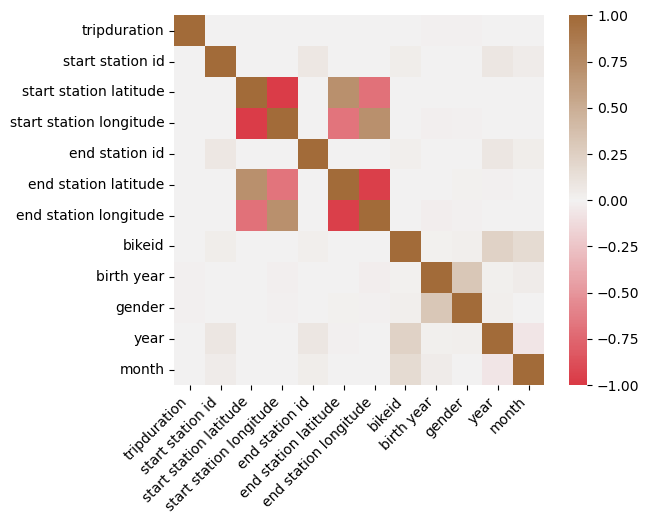

In [17]:
corr_bike_df1 = df.corr()
ax = sns.heatmap(
    corr_bike_df1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 400, n=500),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Summary

- Red Shows no correlation at all
- The Brown diagonal shows a high correlation

- Correlation is identified in the following columns

    1. Month and bikeid
    2. Month and stat station id
    3. Month and end station_id
    4. birth year and gender
   
- Non Corellating columns are
    1. Longitudes and latitudes of the stations

#### Feature Independence Plots

In [18]:
df.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month,postal code
314147,467,2019-10-03 19:14:04.9310,2019-10-03 19:21:51.9740,176,Lesley University,42.386748,-71.119019,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,2636,Subscriber,1998.0,1.0,2019,10,NaN
1607433,655,2019-06-01 10:31:01.3850,2019-06-01 10:41:56.5030,24,Seaport Square - Seaport Blvd at Northern Ave,42.351482,-71.044361,150,State Street at Channel Center,42.344137,-71.052608,3367,Subscriber,1993.0,1.0,2019,6,NaN
1419140,1631,2019-07-13 22:16:23.7480,2019-07-13 22:43:35.3610,318,Ames St at Broadway,42.363693,-71.087567,60,Charles Circle - Charles St at Cambridge St,42.360793,-71.071190,2809,Customer,1969.0,0.0,2019,7,NaN


Analysis on the Number of trips per User Type

In [19]:
df.shape

(316555, 18)

In [20]:
bike_by_usertype = df.groupby(bike_df1['usertype']).sum()['tripduration']

In [21]:
type(bike_by_usertype)

pandas.core.series.Series

#### Station Trip duration and Usertype name 

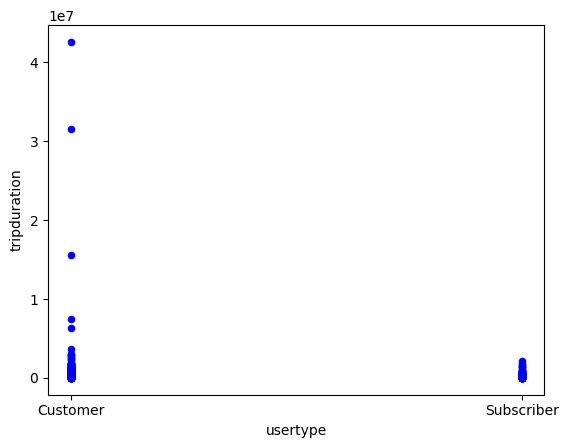

In [22]:
df.plot(kind='scatter',x='usertype',y='tripduration',color='blue')
plt.show()

#### Station Trip duration and end station name

#### Station Trip duration and birth year

In [23]:
# df.plot(kind='bar',x='tripduration',y='birth year')

#### Trip duration by Gender

In [24]:
bike_df1.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,790,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,370,Dartmouth St at Newbury St,42.350961,-71.077828,33,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950,1,2019,12
1,166,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993,1,2019,12
2,323,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,381,Inman Square at Springfield St.,42.374384,-71.100157,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4875,Subscriber,1992,1,2019,12


#### Number of trips by month

In [25]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month,postal code
145787,3496,2020-11-26 00:10:35.1070,2020-11-26 01:08:51.7680,93,JFK/UMass T Stop,42.320340,-71.051180,93,JFK/UMass T Stop,42.320340,-71.051180,2198,Customer,NaN,NaN,2020,11,02125
1523127,574,2019-07-24 17:28:16.5240,2019-07-24 17:37:50.7360,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,400,Lansdowne T Stop,42.347345,-71.100168,5037,Subscriber,1994.0,2.0,2019,7,NaN
1293307,811,2020-06-06 11:04:19.7240,2020-06-06 11:17:51.3460,233,St Mary's,42.346197,-71.107287,415,Stuart St at Berkeley St,42.349544,-71.072421,3571,Subscriber,NaN,NaN,2020,6,02116


#### Trip duration distribution by Month

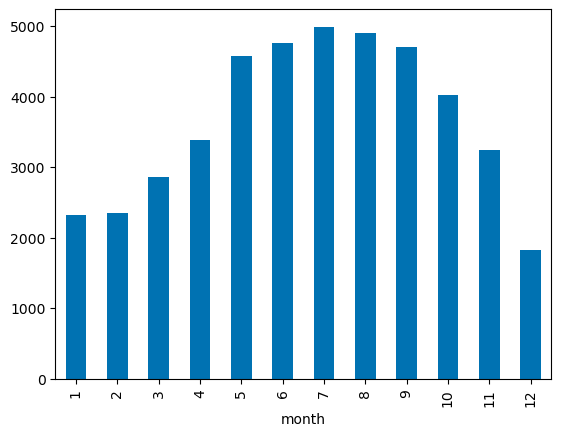

In [26]:
df.groupby('month')['tripduration'].nunique().plot(kind='bar')
plt.show()

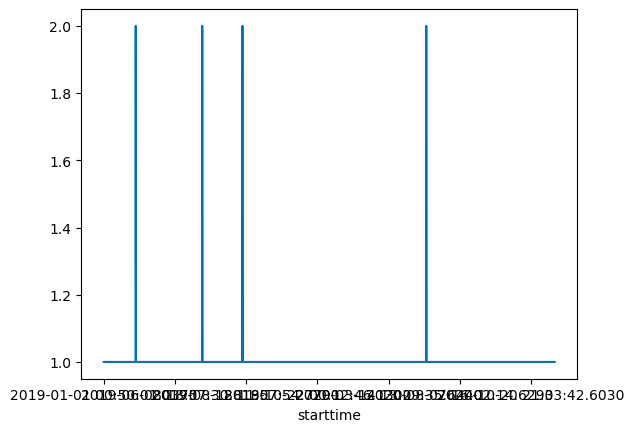

In [34]:
df.groupby('starttime')['tripduration'].nunique().plot(kind='line')
plt.show()